# Vis: Lines and Related Geometries

*Purpose*: *Line plots* are a key tool for EDA. In contrast with a scatterplot, a line plot assumes the data have a *function* relation. This can create an issue if we try to plot data that do not satisfy our assumptions. In this exercise, we'll practice some best-practices for constructing line plots.


## Setup


In [1]:
import grama as gr
DF = gr.Intention()
%matplotlib inline

We'll use the mpg and economics datasets in this exercise.


In [2]:
# from grama.data import df_diamonds
from plotnine.data import economics as df_economics
from plotnine.data import mpg as df_mpg


# Line Plots

In the [previous exercise](https://zdelrosario.github.io/evc-course/exercises_solution/d09-e-vis03-scatterplot-solution.html) we learned about using scatterplots to study the relationship between two variables. This works well for a variety of datasets, as our eyes can readily pick out trends in the data even in a "sea of dots."


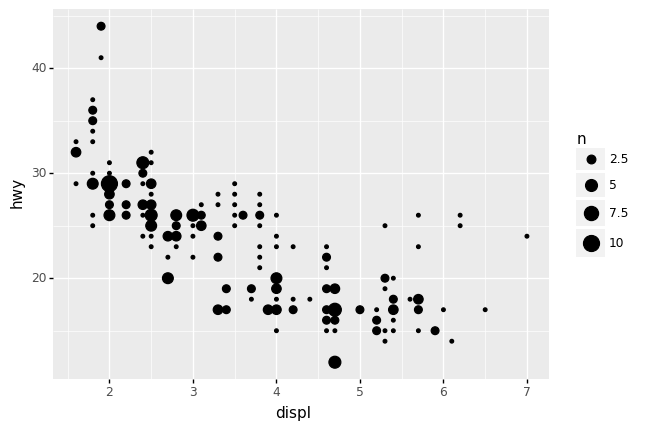

<ggplot: (8770709791263)>

In [3]:
## NOTE: No need to edit
(
    df_mpg
    >> gr.ggplot(gr.aes("displ", "hwy"))
    + gr.geom_count()
)

However, a scatterplot is not always the *ideal* visual; for instance, the following shows the personal savings rate `psavert` of the US Population.


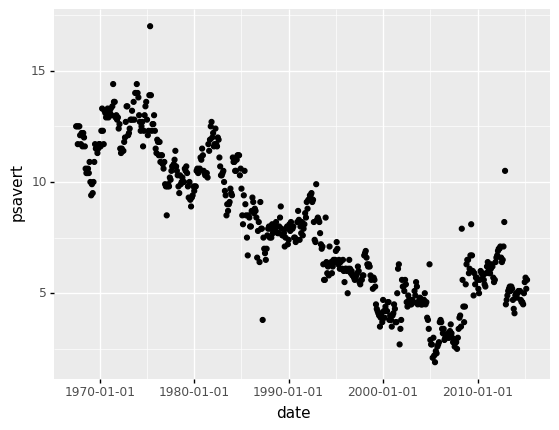

<ggplot: (8770709864554)>

In [4]:
## NOTE: No need to edit
(
    df_economics
    >> gr.ggplot(gr.aes("date", "psavert"))
    + gr.geom_point()
)

Here we can see the overall trend in the data, but it's harder to make out the smaller ups and downs in the value. We could visualize the same dataset with `gr.geom_line()` to directly connect each point with lines:


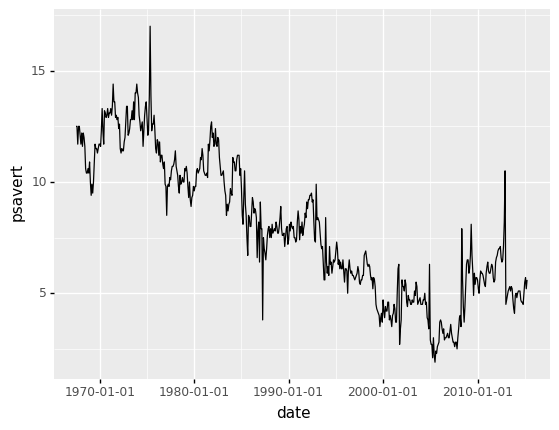

<ggplot: (8770726185051)>

In [5]:
## NOTE: No need to edit
(
    df_economics
    >> gr.ggplot(gr.aes("date", "psavert"))
    + gr.geom_line()
)

Since each point is now directly connected to its neighbor, we can more readily see the small changes in `psavert` across time.


## Limitations of Lines: Function relations only

While lines have their advantages, they have an important limitation:

> A line plot is only appropriate for data that have a *function* relationship; that is, for each `x` value, there is only one `y` value.

Let's use the mpg dataset to see what happens when we plot data that *fail* to have this function relationship.


### __q1__ Make and assess a line plot

Convert the following into a line plot. Answer the questions under *observations* below.


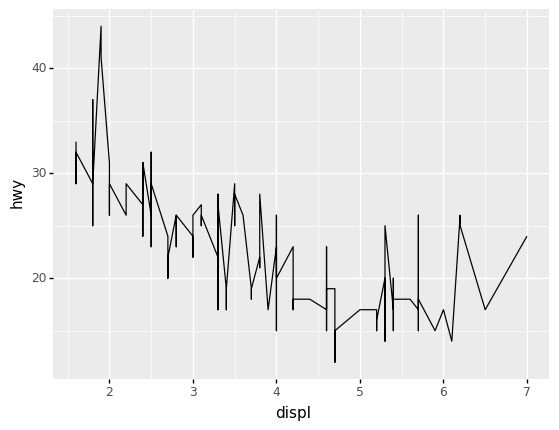

<ggplot: (8770709826618)>

In [6]:
## TASK: Convert to a line plot
(
    df_mpg
    >> gr.ggplot(gr.aes("displ", "hwy"))
    # + gr.geom_point()
    + gr.geom_line()
)


*Observations*

- Using the scatterplot, can you tell if the data have a function relationship? How do you know?
  - The data do *not* have a function relationship; we can clearly see that there are multiple values of `hwy` for the same value of `disp`. For example, at `disp == 2.0` we see a "string" of values from `hwy == 26` to `hwy == 31`.
- Hide the dots and show the line; does this give you a correct impression of the trends in the data? Why or why not?
  - No; the line plot does not give a correct impression of the data. For instance, we cannot see the "string" of values at `disp == 2.0` from the line plot; are there values at only the points `hwy == 26` and `hwy == 31`, or are there values at *all* of the points between those two ends?
<!-- solution-end -->

### Functions within groups

Sometimes a dataset will fail to have a function relationship because there are *multiple groups* that each have their own function relationship. For instance, if we were doing sweeps in $x$ for the following function

$$y = c \exp(x),$$

and we considered multiple values of $c$, there *would* be a function relationship, but we would need to consider each unique value of $c$ separately. Visualizing multiple values of $c$ together would create an incomprehensible mess:


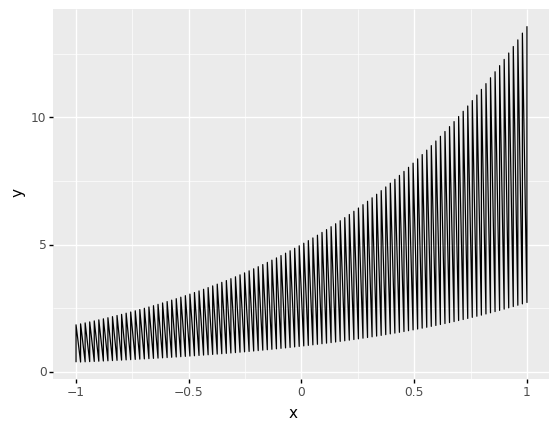

<ggplot: (8770710220858)>

In [7]:
## NOTE: No need to edit
# Generate a dataset
df_groups = (
    gr.Model()
    >> gr.cp_vec_function(
        fun=lambda df: gr.df_make(y=df.c * gr.exp(df.x)),
        var=["c", "x"],
        out=["y"],
    )
    >> gr.ev_df(df=gr.df_grid(c=[1, 5], x=gr.linspace(-1, 1, 100)))
)

# Visualize
(
    df_groups
    >> gr.ggplot(gr.aes("x", "y"))
    + gr.geom_line()
)

However, we can easily fix this problem by using the `group` aesthetic.


### __q2__ Separate the lines

Use the `group` aesthetic to separate the lines belonging to different values of `c`.


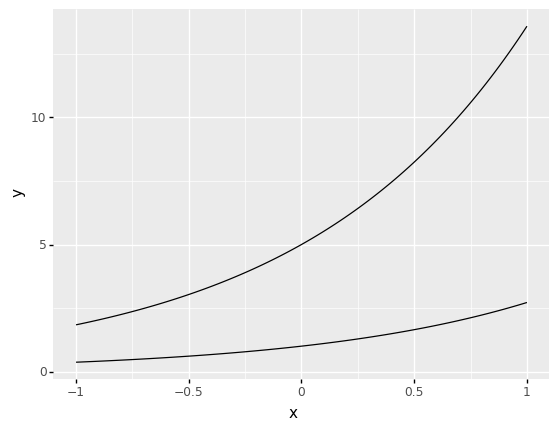

<ggplot: (8770676036051)>

In [8]:
## TASK: Assign the `group` aesthetic to separate the lines
(
    df_groups
    >> gr.ggplot(gr.aes(
        x="x",
        y="y",
        group="c",
    ))
    + gr.geom_line()
)

Note that it's good practice to *visually* distinguish different groups. However, you'll need to assign both the group aesthetic along with the visual aesthetic to make this work. The following plot demonstrates this; try uncommenting the `group` aesthetic to see how this affects the plot.


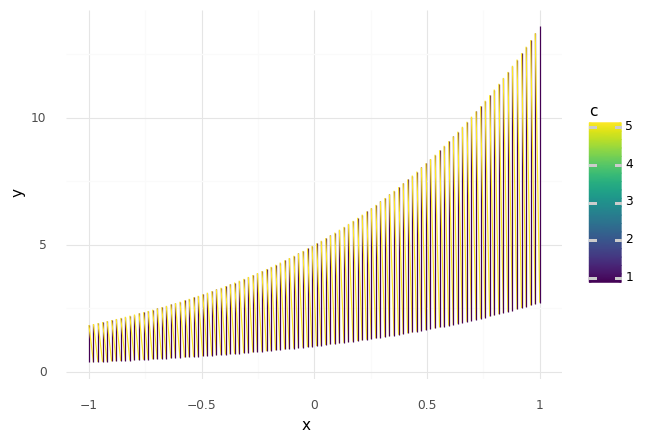

<ggplot: (8770710210609)>

In [9]:
## TRY IT: Try uncommenting the line below to see how it changes the plot
(
    df_groups
    >> gr.ggplot(gr.aes(
        x="x", 
        y="y", 
        # group="c", # Try uncommenting this to fix the plot
        color="c",
    ))
    + gr.geom_line()
    + gr.theme_minimal()
)


# Line Helpers

In addition to a "raw" line plot, there are a variety of related geometries that we can use a "line-like helpers."


## Guide lines

There are a variety of line geometries that are useful as *guide lines*:

| Geometry | Use | Key Aesthetics |
|----------|-----|----------------|
| `gr.geom_hline()` | Horizontal guideline | `yintercept` |
| `gr.geom_vline()` | Vertical guideline | `xintercept` |
| `gr.geom_abline()` | Diagonal guideline | `intercept, slope` |

For example, we can use a horizontal guideline to compare a trend in time against some fixed value of interest. Suppose we were interested in the value $10\%$; we could mark that value on the economics dataset:


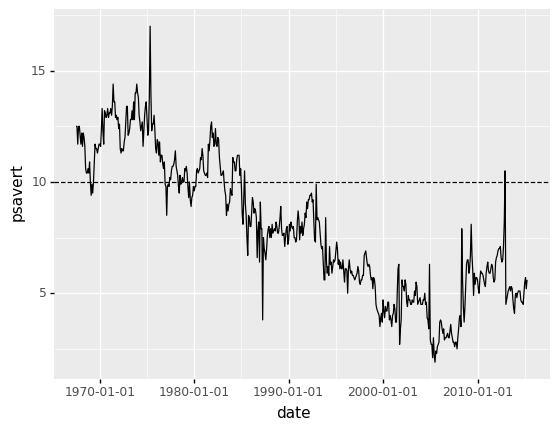

<ggplot: (8770726381291)>

In [10]:
## NOTE: No need to edit
(
    df_economics
    >> gr.ggplot(gr.aes("date", "psavert"))
    + gr.geom_hline(yintercept=10, linetype="dashed")
    + gr.geom_line()
)

Using a `"dashed"` line simply helps distinguish it from the plot of the data.

However, we can also assign the aesthetic *within* `gr.aes()` in order to use values in the dataset. For instance, we could use this to compute and visualize the mean over all time:


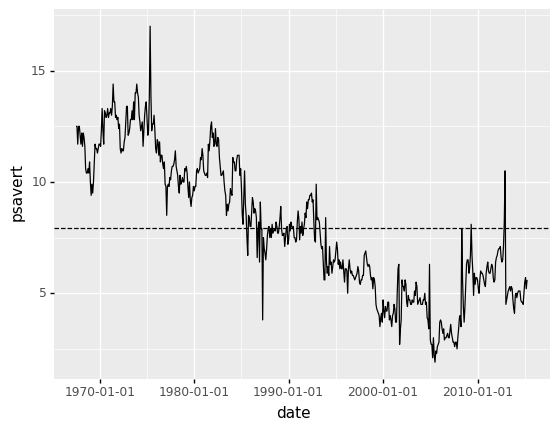

<ggplot: (8770726368160)>

In [11]:
## NOTE: No need to edit
(
    df_economics
    >> gr.ggplot(gr.aes("date", "psavert"))
    + gr.geom_hline(
        data=df_economics
        >> gr.tf_summarize(psavert=gr.mean(DF.psavert)),
        # NOTE: We're using `yintercept` *inside* gr.aes(...)
        mapping=gr.aes(yintercept="psavert"),
        # NOTE: We're not using `yintercept` outside gr.aes(...)
        # yintercept=???, # This is how we "hard code" a value, not how we use data
        linetype="dashed",
    )
    + gr.geom_line()
)

Let's practice applying a guideline to a plot.


### __q3__ Add a diagonal guideline

Add a diagonal guideline with a slope of `1` and an intercept of `0`. Answer the questions under *observations* below.


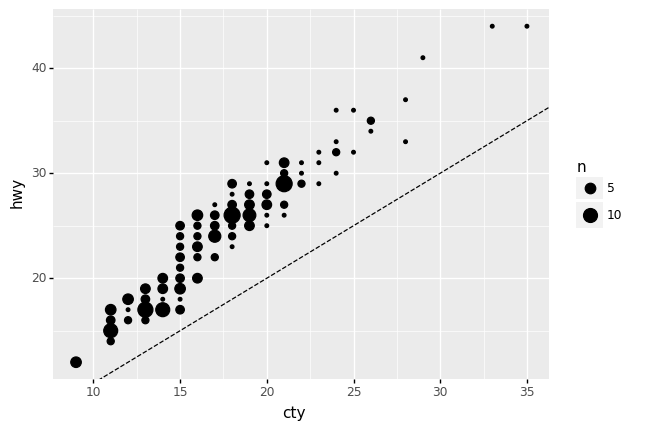

<ggplot: (8770726404069)>

In [12]:
## TASK: Add a guideline with slope=1 and intercept=0
(
    df_mpg
    >> gr.ggplot(gr.aes("cty", "hwy"))
    + gr.geom_abline(slope=1, intercept=0, linetype="dashed")
    + gr.geom_count()
)

*Observations*

- Are there any vehicles that have a `cty` value larger than their `hwy` value? How do you know?
  - No; we can tell because all of the dots lie above the line with `slope=1` and `intercept=0`. This is the line where `hwy == cty`; points above this line have `hwy > cty`.
<!-- solution-end -->

Note that we can use additional aesthetics within guidelines such as `gr.geom_vline()` and `gr.geom_hline()`. For instance, the following plot computes a mean `displ` for each vehicle `class`, and visualizes it as a vertical line:


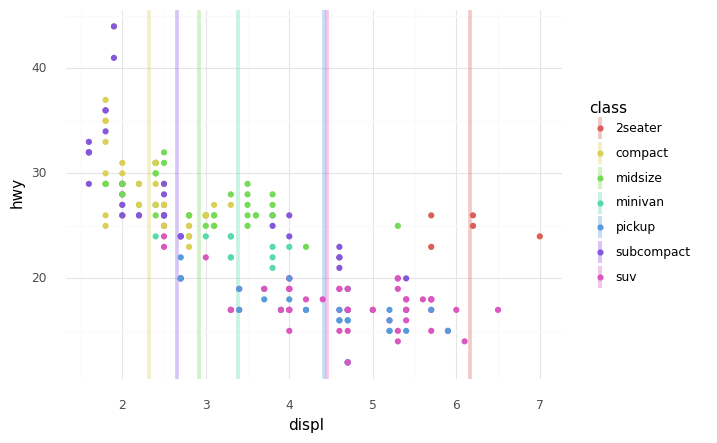

<ggplot: (8770697797885)>

In [13]:
## NOTE: No need to edit
(
    df_mpg
    >> gr.ggplot(gr.aes("displ", "hwy", color="class"))
    + gr.geom_vline(
        # Summarize across `class`
        data=df_mpg
        >> gr.tf_group_by("class")
        >> gr.tf_summarize(displ=gr.mean(DF.displ)),
        mapping=gr.aes(xintercept="displ", color="class"),
        size=1.5,
        alpha=1/3,
    )
    + gr.geom_point()
    + gr.theme_minimal()
)

Using a combination of guidelines and aesthetics (possibly driven by the dataset), we have extraordinary flexibility in desining and annotating plots!


## Smooth trends

When our data do not have a function relationship, we can use *smoothing* to add a trend line to the data. This is useful for highlighting an "overall" trend, and often works well when combined with a scatterplot.


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.


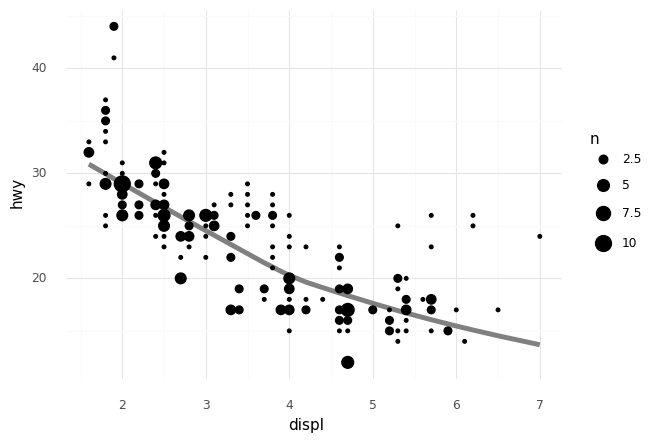

<ggplot: (8770726190068)>

In [14]:
## NOTE: No need to edit
(
    df_mpg
    >> gr.ggplot(gr.aes("displ", "hwy"))
    + gr.geom_smooth(color="grey", size=2)
    + gr.geom_count()
    + gr.theme_minimal()
)

Note that the trend line tends to follow the "middle" of the data; for instance, the small set of higher-`hwy` cars at higher `displ` (the `2seater` vehicles) do not strongly affect the trend, which instead follows the bulk of the data.

The geometry `gr.geom_smooth()` *also* accepts additional aesthetics, as you'll see in the following task:


### __q4__ Add an aesthetic to a smoothed plot

Use an additional aesthetic to distinguish between `class` in the following plot. Answer the questions under *observations* below.


/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/stats/smoothers.py:310: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
/Users/zach/opt/anaconda3/envs/evc/lib/python3.9/site-packages/plotnine/stats/smoothers.py:310: Plot

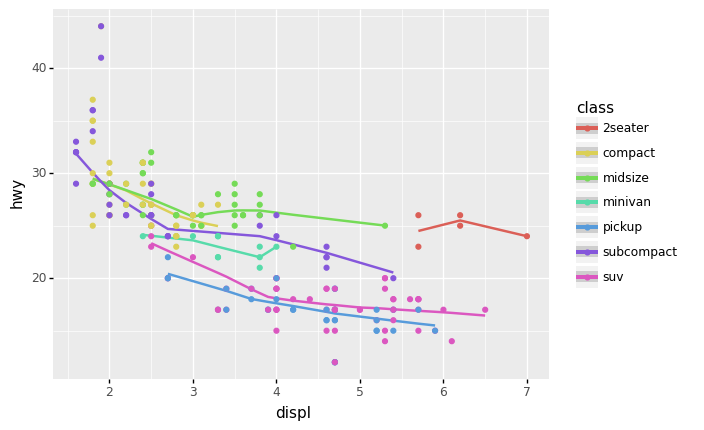

<ggplot: (8770697867825)>

In [15]:
## TASK: Add an aesthetic to distinguish the `class` variable
(
    df_mpg
    >> gr.ggplot(gr.aes(
        x="displ", 
        y="hwy", 
        color="class"
    ))
    + gr.geom_smooth()
    + gr.geom_point()
)

*Observations*

- What is similar about the smoothed trend across different vehicle `class`es?
  - Generally, every class tends to have a downward trend between `hwy` and `displ`.
- What is different about the smoothed trend across different vehicle `class`es?
  - The various trends tend to be quite offset in their `hwy` values; for instance, the `midsize` vehicles span a similar range of `displ` as the `subcompact` vehicles, but the `midsize` trend line is entirely above the `subcompact` trendline.
<!-- solution-end -->